<a href="https://colab.research.google.com/github/shivanshus/Machine-Learning-Projects/blob/main/Object_Classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author - Shivanshu Srivastava (shivanshu.srivastava@plaksha.org)

# I have used version of caltech256 data available on kaggle (https://www.kaggle.com/jessicali9530/caltech256).

## 1. **A customized model was designed for the object classification task.**

Then from that big data set I took following 10 classes for objection detection model - 

[bathtub - 229, bike - 414, cycle - 107, dog - 189, people - 206, phonebooth - 81, postbox - 90, refrigerator - 81, trafficlight - 96, washingmachine - 81]

Each image of size = (250,350,3)


# Sample Images from 10 classes

/content/bathtub.jpg


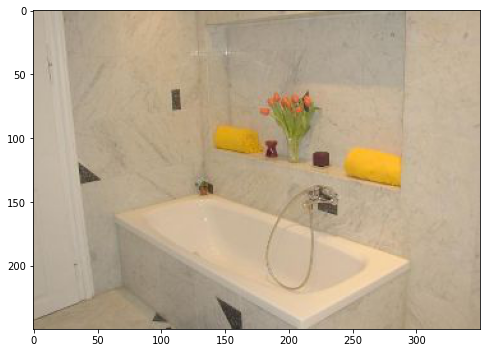

/content/bike.jpg


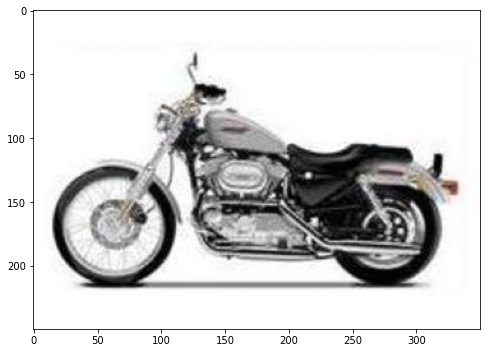

/content/cycle.jpg


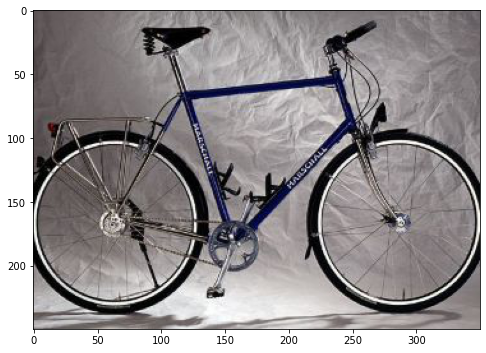

/content/dog.jpg


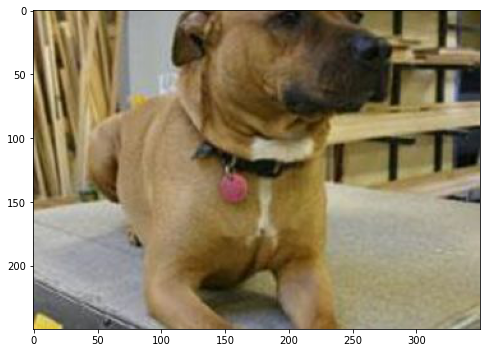

/content/people.jpg


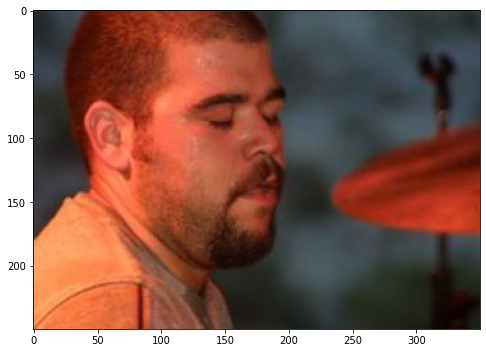

/content/phonebooth.jpg


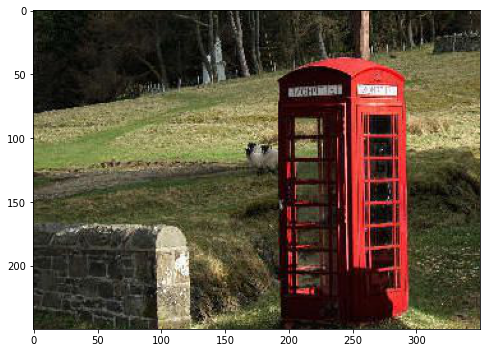

/content/postbox.jpg


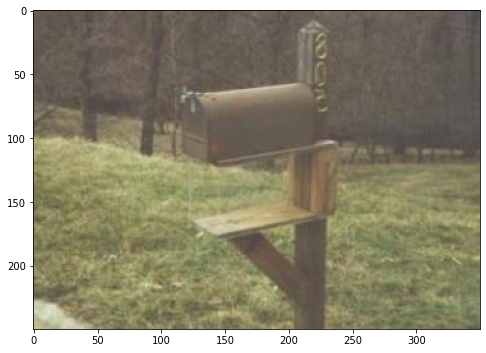

/content/refrigerator.jpg


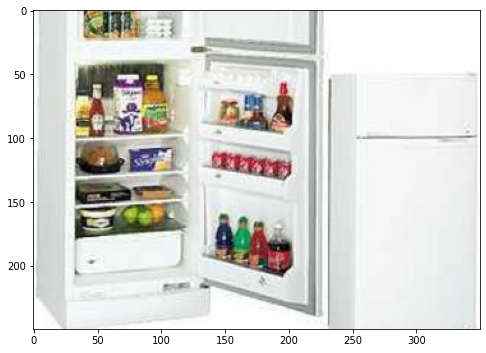

/content/trafficlight.jpg


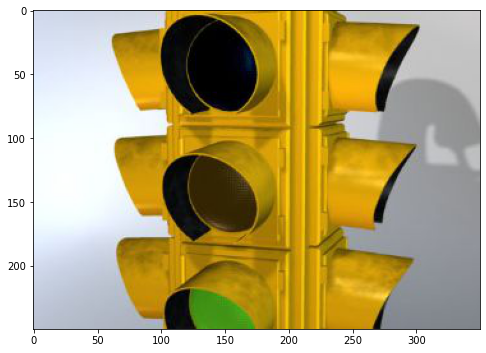

/content/washingmachine.jpg


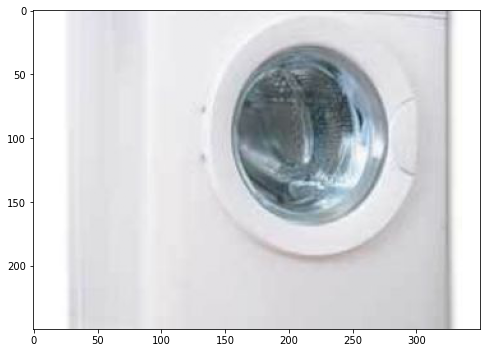

In [ ]:
# Visualizing sample images from 10 classes

import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
images = ['/content/bathtub.jpg','/content/bike.jpg','/content/cycle.jpg','/content/dog.jpg','/content/people.jpg','/content/phonebooth.jpg','/content/postbox.jpg','/content/refrigerator.jpg','/content/trafficlight.jpg','/content/washingmachine.jpg']
for img in images:

    url = img
    imgs = image.load_img(url, target_size=(250, 350,3))
    x = image.img_to_array(imgs)
    x = np.expand_dims(x, axis = 0)
    x /= 255
    
    x = np.array(x, 'float32')
    x = x.reshape([250,350,3]);
    print(url)
    plt.figure(figsize=(8,6))
    plt.imshow(x)
    plt.show()

In [ ]:
# import libraries and deep learning frameworks

import tensorflow as tf
import keras
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,MaxPooling2D,Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing import image

In [ ]:
# Designing a deep learning model using Tensorflow and Keras.

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout, Input
from tensorflow.keras.utils import to_categorical


def dl_model():
   
    model = Sequential()
    inputs = Input(shape=(250,350,3))
    layer_1 = Conv2D(64, (3,3), activation='tanh',name='conv1')(inputs)
    layer_2 = MaxPooling2D(pool_size=(3,3), strides=(2,2), name='pool1')(layer_1)
    layer_3 = Conv2D(64, (3,3), activation='relu', name='conv2')(layer_2)
    layer_4 = MaxPooling2D(pool_size=(3,3), strides=(2,2), name='pool2')(layer_3)
    
    #layer_5 = Conv2D(64, (3,3), activation='relu', name='conv3')(layer_4)
    #layer_6 = MaxPooling2D(pool_size=(3,3), strides=(2,2), name='pool3')(layer_5)
    #layer_7 = Conv2D(64, (3,3), activation='relu', name='conv4')(layer_6)
    #layer_8 = MaxPooling2D(pool_size=(3,3), strides=(2,2), name='pool4')(layer_7)
    
    layer_9 = Flatten(name='flat')(layer_4)
    layer_10 = Dense(512, activation='relu', name='dense1')(layer_9)
    layer_11 = Dense(512, name='dense2')(layer_10)
    layer_12 = Dense(10, activation='softmax', name='classifier')(layer_11)
    
    model = Model(inputs=inputs, outputs=layer_12)
    model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [ ]:
model_1 = dl_model()

In [ ]:
# fitting the model using ".flow_from_directory" which extracts training images from folder stored in google drive.

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/TRAIN_DATA',
        target_size=(250,350),        
        batch_size=16,
        color_mode='rgb',
        class_mode='categorical')


Found 1954 images belonging to 10 classes.
Found 1954 images belonging to 10 classes.


In [ ]:
# training the model

model_1.fit(train_generator, steps_per_epoch=10, epochs=75)

Epoch 1/75
10/10 [==============================] - 3s 295ms/step - loss: 19.9861 - accuracy: 0.2937
Epoch 2/75
10/10 [==============================] - 3s 296ms/step - loss: 1.7846 - accuracy: 0.4375
Epoch 3/75
10/10 [==============================] - 3s 292ms/step - loss: 1.3487 - accuracy: 0.5437
Epoch 4/75
10/10 [==============================] - 3s 292ms/step - loss: 1.5793 - accuracy: 0.4875
Epoch 5/75
10/10 [==============================] - 3s 287ms/step - loss: 1.5379 - accuracy: 0.4750
Epoch 6/75
10/10 [==============================] - 3s 296ms/step - loss: 1.5369 - accuracy: 0.5375
Epoch 7/75
10/10 [==============================] - 3s 293ms/step - loss: 1.5729 - accuracy: 0.4875
Epoch 8/75
10/10 [==============================] - 3s 293ms/step - loss: 1.5270 - accuracy: 0.5562
Epoch 9/75
10/10 [==============================] - 3s 295ms/step - loss: 1.2431 - accuracy: 0.6125
Epoch 10/75
10/10 [==============================] - 3s 290ms/step - loss: 1.3747 - accuracy: 0.581

In [ ]:
# script to visualize the output classification

def object_classification(Object):
    objects = ('bathtub', 'bike', 'cycle', 'dog', 'people', 'phonebooth', 'postbox', 'refrigerator', 'trafficlight', 'washingmachine')
    y = np.arange(len(objects))
    
    plt.figure(figsize=(14,9))
    plt.bar(y, Object, align='center')
    plt.xticks(y, objects)
    plt.ylabel('percentage')
    plt.title('object')
    
    plt.show()

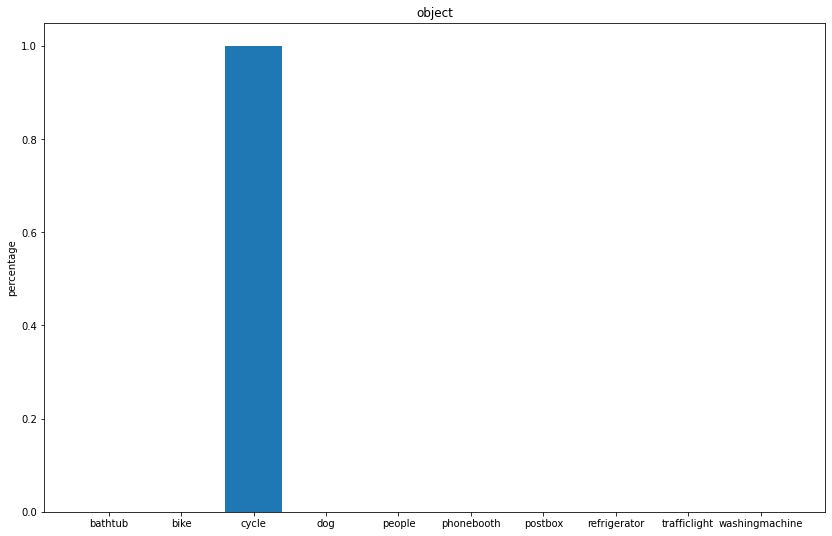

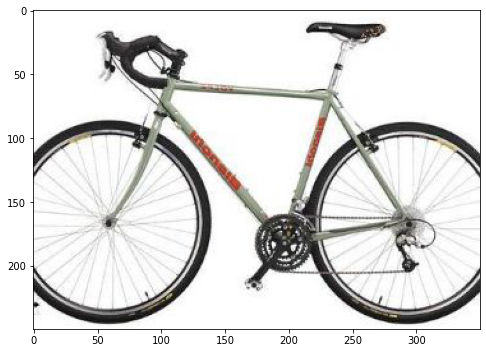

In [ ]:
# using the trained model to check the classification of the images stored on google colab
# place the url of the image in the placeholder/ variable url to use this block of code

url = '/content/224_0002.jpg'

import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
img = image.load_img(url, target_size=(250, 350,3))
 
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
 
x /= 255
 
custom = model_1.predict(x)
object_classification(custom[0])
 
x = np.array(x, 'float32')
x = x.reshape([250,350,3]);

plt.figure(figsize=(8,6))
plt.imshow(x)
plt.show()

## I also tried transfer learning to explore.

#**2. A fine tuned model (using transfer learning ) was designed for the object classification task.**

##**MobileNetV2 is used for fine tuning , pre-trained on Imagenet dataset.**

In [ ]:
#importing libraries and deep learning frameworks

import tensorflow as tf
import keras
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Input, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.preprocessing import image

In [ ]:
# using MobileNetV2 with Imagenet weights
# removing the few last layers and adding 3 more layers with one as a classifier at the end.

model = MobileNetV2(weights='imagenet', include_top=False)
print('model loaded')

x= model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512,activation='relu')(x)
x = Dense(512,activation='relu')(x) 
preds = Dense(10,activation='softmax')(x) #final layer with softmax activation for 10 classes

model loaded


In [ ]:
# instantiating the model

from tensorflow.keras.models import Model
model_2 = Model(inputs=model.input,outputs=preds)

In [ ]:
model_2.summary()

Model: "functional_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, None, None,  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_10[0][0]                   
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, None, None, 3 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, None, None, 3 128         Conv1[0][0]                      
______________________________________________________________________________________

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# visualizing the layers of the model

layer_no = 0
for i, layer in enumerate(model_2.layers):
   layer_no += 1
   print(i, layer.name)
print('\n')
print('total number of layer in the model = {}'.format(layer_no))

0 input_10
1 Conv1_pad
2 Conv1
3 bn_Conv1
4 Conv1_relu
5 expanded_conv_depthwise
6 expanded_conv_depthwise_BN
7 expanded_conv_depthwise_relu
8 expanded_conv_project
9 expanded_conv_project_BN
10 block_1_expand
11 block_1_expand_BN
12 block_1_expand_relu
13 block_1_pad
14 block_1_depthwise
15 block_1_depthwise_BN
16 block_1_depthwise_relu
17 block_1_project
18 block_1_project_BN
19 block_2_expand
20 block_2_expand_BN
21 block_2_expand_relu
22 block_2_depthwise
23 block_2_depthwise_BN
24 block_2_depthwise_relu
25 block_2_project
26 block_2_project_BN
27 block_2_add
28 block_3_expand
29 block_3_expand_BN
30 block_3_expand_relu
31 block_3_pad
32 block_3_depthwise
33 block_3_depthwise_BN
34 block_3_depthwise_relu
35 block_3_project
36 block_3_project_BN
37 block_4_expand
38 block_4_expand_BN
39 block_4_expand_relu
40 block_4_depthwise
41 block_4_depthwise_BN
42 block_4_depthwise_relu
43 block_4_project
44 block_4_project_BN
45 block_4_add
46 block_5_expand
47 block_5_expand_BN
48 block_5_ex

In [ ]:
# freezing and un-freezing the layers for fine tuning the model.

for layer in model_2.layers[:145]:
   layer.trainable = False
for layer in model_2.layers[145:]:
   layer.trainable = True

In [ ]:
# compiling the model

from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from tensorflow.keras import metrics 
model_2.compile(optimizer=Adam(learning_rate=0.05), loss='categorical_crossentropy', metrics=[metrics.categorical_accuracy])

In [ ]:
# fitting the model on the same data stored in google drive.

train_datagen = ImageDataGenerator(
        rescale=1./255,
        preprocessing_function = preprocess_input,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/TRAIN_DATA',
        
        batch_size=16,
        color_mode='rgb',
        class_mode='categorical')

model_2.fit_generator(
        train_generator,
        steps_per_epoch=10,
        epochs=75
        )

Found 1954 images belonging to 10 classes.
Epoch 1/75
10/10 [==============================] - 2s 213ms/step - loss: 132.7667 - categorical_accuracy: 0.2000
Epoch 2/75
10/10 [==============================] - 2s 216ms/step - loss: 2.0873 - categorical_accuracy: 0.3562
Epoch 3/75
10/10 [==============================] - 2s 214ms/step - loss: 2.1312 - categorical_accuracy: 0.3000
Epoch 4/75
10/10 [==============================] - 2s 212ms/step - loss: 2.1505 - categorical_accuracy: 0.3063
Epoch 5/75
10/10 [==============================] - 2s 214ms/step - loss: 1.8884 - categorical_accuracy: 0.4375
Epoch 6/75
10/10 [==============================] - 2s 211ms/step - loss: 1.8230 - categorical_accuracy: 0.4437
Epoch 7/75
10/10 [==============================] - 2s 211ms/step - loss: 1.8816 - categorical_accuracy: 0.4437
Epoch 8/75
10/10 [==============================] - 2s 213ms/step - loss: 2.0114 - categorical_accuracy: 0.3630
Epoch 9/75
10/10 [==============================] - 2s 214m

In [ ]:
# script for visualizing the classification output of the model.

def object_classification(Object):
    objects = ('bathtub', 'bike', 'cycle', 'dog', 'people', 'phonebooth', 'postbox', 'refrigerator', 'trafficlight', 'washingmachine')
    y = np.arange(len(objects))
    
    plt.figure(figsize=(14,9))
    plt.bar(y, Object, align='center')
    plt.xticks(y, objects)
    plt.ylabel('percentage')
    plt.title('object')
    
    plt.show()

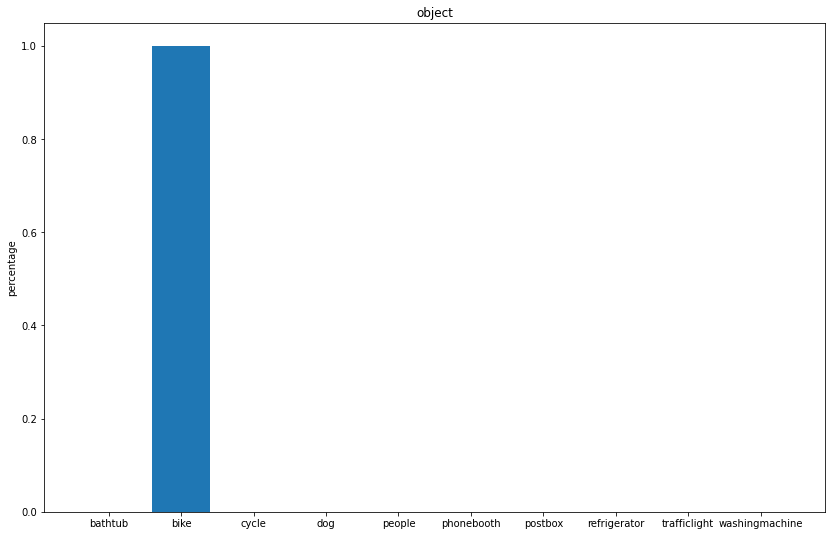

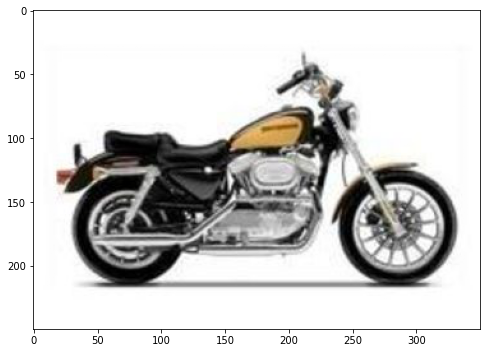

In [ ]:
# using the trained model to check the classification of the images stored on google colab
# place the url of the image in the placeholder to use this block of code

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

url = '/content/145_0020.jpg'

import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
img = image.load_img(url, target_size=(250, 350,3))
 
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
 
x /= 255
 
custom = model_2.predict(x)
object_classification(custom[0])
 
x = np.array(x, 'float32')
x = x.reshape([250,350,3]);

plt.figure(figsize=(8,6))
plt.imshow(x)
plt.show()

In [ ]:
model_1.save('model_1.h5')

In [ ]:
model_2.save('model_2.h5')